# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

####Preprocessing

#### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

#Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import nltk
from nltk.chunk import ne_chunk
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

#Data

In [ ]:
#https://stackoverflow.com/questions/37333299/splitting-a-pandas-dataframe-column-by-delimiter
!unrar x "/content/documents.rar" "/content/output_folder/"

In [4]:
data =[]
for filename in os.listdir("/content/output_folder/documents"):
        # Your code comes here such as        
        data.append(filename)

print(len(data))    

18828


In [ ]:
#https://stackoverflow.com/questions/42339876/error-unicodedecodeerror-utf-8-codec-cant-decode-byte-0xff-in-position-0-in
file_data =[]
for file in data:
  path = "/content/output_folder/documents/" + file

  file1 = open(path, encoding="utf8", errors='ignore')
  fileContent = file1.read()
  file_data.append(fileContent)
  file1.close()

print(len(file_data))

df = pd.DataFrame({'Name':data,'Text':file_data})

df['label'] = [x.split('_')[0] for x in df['Name']]

df.head()


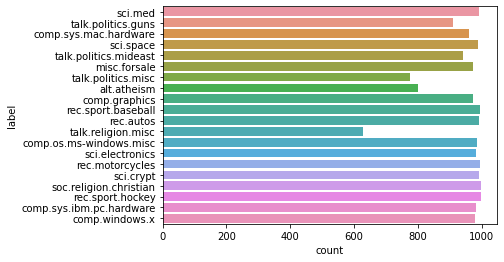

In [7]:
sns.countplot(y="label", data = df)

#Preprocesing

In [166]:
#https://www.tutorialspoint.com/python_text_processing/python_extract_emails_from_text.htm#:~:text=To%20extract%20emails%20form%20text,text%20which%20matc
#To get the emails

def get_email(text):
  emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", text)
  #print(emails)
  val = ''
  for email in emails:
    word = email.split('@')[1].split('.')
    for w in word:
      if len(w) <= 2 or w=='com':
        continue
      else:
        val = val + ' ' + w
  return val
  
df['email'] = df['Text'].apply(get_email)

In [165]:
# To get the subject
def get_subject(text):
  subject = re.findall("Subject.+", text)
  subject = ' '.join([str(item) for item in subject])

  subject = re.findall('.+:(.+)',subject)

  #subject = re.sub('\\.*','', subject)
  subject =' '.join([str(item) for item in subject])

  subject = re.sub('\W+',' ', subject)
  #re.sub('\W+',' ', subject)
  return subject

df['subject'] = df['Text'].progress_apply(get_subject)


  0%|          | 0/18828 [00:00<?, ?it/s]

In [167]:
#To clean the text
def text_clean(text):
  # 1 remove Email
  text = re.sub(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+",' ', text)

  # 2 remove Subject
  text = re.sub("Subject.+",'', text)

  # 3 remove Write From
  text = re.sub("From.+|Write to:.+",'', text)
  
  #tags <> 
  text = re.sub("<(.*?)>",'', text)

  # Brackets
  text = re.sub("\(.*\)",'', text)
  
  #New line
  text = re.sub(r"\n|\t|-|\\|>\<",' ', text)

  # End with :
  text = re.sub(r"\w+:",'', text)

  # decontraction
  def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

  text = decontracted(text)
  
  #Replace digits 
  text = re.sub(r"\d+",' ', text)

  #Text cleaning
  text = re.sub('\W+',' ', text)

  # Some chunking

  temp=[] #To store the chunks
  for sent in nltk.sent_tokenize(text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
      if hasattr(chunk, 'label'): #Returns true if chunk has Label
        #Appending if label is 'GPE
        if chunk.label() == 'GPE':
          temp.append("_".join(c[0] for c in chunk))
      #Neglecting if its a 'PERSON
        elif chunk.label()!= 'PERSON':
          temp.append ("_".join(c[0] for c in chunk))
      else:
        temp.append (chunk[0])
  
  text = ' '.join(temp)

  #remove the _ from these type of words if in end or start like word_/_word_
  a = re.findall("\s_\w+|\w+_\s",text)
  a= [i.replace('_',' ') for i in a ]
  text = re.sub('\s_\w+|\w+_\s',' ', text)
  for word in a:
    text = text + ' '+ word 
  
  #filter _ with less than 2 will make d_berlin to berlin

  a = re.findall(r"\w+_\w+",text)
  middle_ = []
  for i in a:
    words = i.split('_')  
    words = [i for i in words if len(i)>2]
    if len(words) == 1:
      middle_.append(''.join(words))
    else:
      middle_.append('_'.join(words))

  text = re.sub('\w+_\w+',' ', text)
  for word in middle_:
    text = text + ' '+ word 
  
  #Remove extrac spaces
  text = re.sub(' +', ' ', text)

  #lower all words
  text = ' '.join([i.lower() for i in text.split(' ') if len(i) > 3 and len(i) <= 15])

  return text

df['clean'] = df['Text'].progress_apply(text_clean)

  0%|          | 0/18828 [00:00<?, ?it/s]

In [168]:
df.to_csv('file1.csv')

###Preprocessingg  with sample

####Done

In [64]:
#Email
a = re.findall("[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", text)
print(a)

text = re.sub("[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+",'', text)
text

['jcopelan@nyx.cs.du.edu', '65882@mimsy.umd.edu', 'mangoe@cs.umd.edu']


'Subject: Re: Gospel Dating @ \r\r\nFrom:  (The One and Only)\nWrite to: The first man\nIn article <  >  (Charley Wingate) writes:\n>\n>I\'ve said 100 times that there is no "alternative" that should think you <THis>\n>might have caught on by now.  And there is no "alternative", but the point\n>is, "rationality" isn\'t an alternative either.  The problems of metaphysical\n>and religious knowledge are unsolvable-- or I should say, humans cannot\n>solve them.\n\nHow does that saying go: Those who say it can\'t be done shouldn\'t interrupt\nthose who are doing it.\n"OneLetter_word"  d_berlin, \n"TwoLetters_word" - eg: dr_berlin ,\n_word_ , _word"  "word_\nMy name is Srikanth Varma, i am living in the New York\nJim\n--\nHave you washed your brain today'

In [65]:
#Subject
a = re.findall("Subject.+", text)
print(a)

text = re.sub("Subject.+",'', text)
text

['Subject: Re: Gospel Dating @ \r\r']


'\nFrom:  (The One and Only)\nWrite to: The first man\nIn article <  >  (Charley Wingate) writes:\n>\n>I\'ve said 100 times that there is no "alternative" that should think you <THis>\n>might have caught on by now.  And there is no "alternative", but the point\n>is, "rationality" isn\'t an alternative either.  The problems of metaphysical\n>and religious knowledge are unsolvable-- or I should say, humans cannot\n>solve them.\n\nHow does that saying go: Those who say it can\'t be done shouldn\'t interrupt\nthose who are doing it.\n"OneLetter_word"  d_berlin, \n"TwoLetters_word" - eg: dr_berlin ,\n_word_ , _word"  "word_\nMy name is Srikanth Varma, i am living in the New York\nJim\n--\nHave you washed your brain today'

In [66]:
a = re.findall("From.+|Write to:.+", text)
print(a)

text = re.sub("From.+|Write to:.+",'', text)
text

['From:  (The One and Only)', 'Write to: The first man']


'\n\n\nIn article <  >  (Charley Wingate) writes:\n>\n>I\'ve said 100 times that there is no "alternative" that should think you <THis>\n>might have caught on by now.  And there is no "alternative", but the point\n>is, "rationality" isn\'t an alternative either.  The problems of metaphysical\n>and religious knowledge are unsolvable-- or I should say, humans cannot\n>solve them.\n\nHow does that saying go: Those who say it can\'t be done shouldn\'t interrupt\nthose who are doing it.\n"OneLetter_word"  d_berlin, \n"TwoLetters_word" - eg: dr_berlin ,\n_word_ , _word"  "word_\nMy name is Srikanth Varma, i am living in the New York\nJim\n--\nHave you washed your brain today'

In [67]:
# tags 1  <>
a = re.findall("<(.*?)>", text)
print(a)

text = re.sub("<(.*?)>",'', text)
text

['  ', 'THis']


'\n\n\nIn article   (Charley Wingate) writes:\n>\n>I\'ve said 100 times that there is no "alternative" that should think you \n>might have caught on by now.  And there is no "alternative", but the point\n>is, "rationality" isn\'t an alternative either.  The problems of metaphysical\n>and religious knowledge are unsolvable-- or I should say, humans cannot\n>solve them.\n\nHow does that saying go: Those who say it can\'t be done shouldn\'t interrupt\nthose who are doing it.\n"OneLetter_word"  d_berlin, \n"TwoLetters_word" - eg: dr_berlin ,\n_word_ , _word"  "word_\nMy name is Srikanth Varma, i am living in the New York\nJim\n--\nHave you washed your brain today'

In [68]:
# Bracket ()
a = re.findall("\(.*\)", text)
print(a)

text = re.sub("\(.*\)",'', text)
text

['(Charley Wingate)']


'\n\n\nIn article    writes:\n>\n>I\'ve said 100 times that there is no "alternative" that should think you \n>might have caught on by now.  And there is no "alternative", but the point\n>is, "rationality" isn\'t an alternative either.  The problems of metaphysical\n>and religious knowledge are unsolvable-- or I should say, humans cannot\n>solve them.\n\nHow does that saying go: Those who say it can\'t be done shouldn\'t interrupt\nthose who are doing it.\n"OneLetter_word"  d_berlin, \n"TwoLetters_word" - eg: dr_berlin ,\n_word_ , _word"  "word_\nMy name is Srikanth Varma, i am living in the New York\nJim\n--\nHave you washed your brain today'

In [69]:
#Remove all the newlines('\n'), tabs('\t'), "-", "\".

a = re.findall(r"\n|\t|-|\\|>\<", text)
print(a)

text = re.sub(r"\n|\t|-|\\|>\<",' ', text)
text



['\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '-', '-', '\n', '\n', '\n', '\n', '\n', '\n', '-', '\n', '\n', '\n', '\n', '-', '-', '\n']


'   In article    writes: > >I\'ve said 100 times that there is no "alternative" that should think you  >might have caught on by now.  And there is no "alternative", but the point >is, "rationality" isn\'t an alternative either.  The problems of metaphysical >and religious knowledge are unsolvable   or I should say, humans cannot >solve them.  How does that saying go: Those who say it can\'t be done shouldn\'t interrupt those who are doing it. "OneLetter_word"  d_berlin,  "TwoLetters_word"   eg: dr_berlin , _word_ , _word"  "word_ My name is Srikanth Varma, i am living in the New York Jim    Have you washed your brain today'

In [70]:
# Remove all the words which ends with ":". Eg: "Anyword:"

a = re.findall(r"\w+:", text)
print(a)

text = re.sub(r"\w+:",'', text)
text



['writes:', 'go:', 'eg:']


'   In article     > >I\'ve said 100 times that there is no "alternative" that should think you  >might have caught on by now.  And there is no "alternative", but the point >is, "rationality" isn\'t an alternative either.  The problems of metaphysical >and religious knowledge are unsolvable   or I should say, humans cannot >solve them.  How does that saying  Those who say it can\'t be done shouldn\'t interrupt those who are doing it. "OneLetter_word"  d_berlin,  "TwoLetters_word"    dr_berlin , _word_ , _word"  "word_ My name is Srikanth Varma, i am living in the New York Jim    Have you washed your brain today'

In [71]:
#Decontracted

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

text = decontracted(text)
text

'   In article     > >I have said 100 times that there is no "alternative" that should think you  >might have caught on by now.  And there is no "alternative", but the point >is, "rationality" is not an alternative either.  The problems of metaphysical >and religious knowledge are unsolvable   or I should say, humans cannot >solve them.  How does that saying  Those who say it can not be done should not interrupt those who are doing it. "OneLetter_word"  d_berlin,  "TwoLetters_word"    dr_berlin , _word_ , _word"  "word_ My name is Srikanth Varma, i am living in the New York Jim    Have you washed your brain today'

In [72]:
#Replace all the digits with space i.e delete all the digits. 

a = re.findall(r"\d+", text)
print(a) 
text = re.sub(r"\d+",' ', text)
text

['100']


'   In article     > >I have said   times that there is no "alternative" that should think you  >might have caught on by now.  And there is no "alternative", but the point >is, "rationality" is not an alternative either.  The problems of metaphysical >and religious knowledge are unsolvable   or I should say, humans cannot >solve them.  How does that saying  Those who say it can not be done should not interrupt those who are doing it. "OneLetter_word"  d_berlin,  "TwoLetters_word"    dr_berlin , _word_ , _word"  "word_ My name is Srikanth Varma, i am living in the New York Jim    Have you washed your brain today'

In [73]:
text = re.sub('\W+',' ', text)
text

' In article I have said times that there is no alternative that should think you might have caught on by now And there is no alternative but the point is rationality is not an alternative either The problems of metaphysical and religious knowledge are unsolvable or I should say humans cannot solve them How does that saying Those who say it can not be done should not interrupt those who are doing it OneLetter_word d_berlin TwoLetters_word dr_berlin _word_ _word word_ My name is Srikanth Varma i am living in the New York Jim Have you washed your brain today'

In [74]:
text_copy = text
text2 = text_copy

In [75]:
#Chunks
temp=[] #To store the chunks
for sent in nltk.sent_tokenize(text):
  for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
    if hasattr(chunk, 'label'): #Returns true if chunk has Label
      #Appending if label is 'GPE
      if chunk.label() == 'GPE':
        temp.append("_".join(c[0] for c in chunk))
    #Neglecting if its a 'PERSON
      elif chunk.label()!= 'PERSON':
        temp.append ("_".join(c[0] for c in chunk))
    else:
      temp.append (chunk[0])


print(temp)

['In', 'article', 'I', 'have', 'said', 'times', 'that', 'there', 'is', 'no', 'alternative', 'that', 'should', 'think', 'you', 'might', 'have', 'caught', 'on', 'by', 'now', 'And', 'there', 'is', 'no', 'alternative', 'but', 'the', 'point', 'is', 'rationality', 'is', 'not', 'an', 'alternative', 'either', 'The', 'problems', 'of', 'metaphysical', 'and', 'religious', 'knowledge', 'are', 'unsolvable', 'or', 'I', 'should', 'say', 'humans', 'can', 'not', 'solve', 'them', 'How', 'does', 'that', 'saying', 'Those', 'who', 'say', 'it', 'can', 'not', 'be', 'done', 'should', 'not', 'interrupt', 'those', 'who', 'are', 'doing', 'it', 'OneLetter_word', 'd_berlin', 'TwoLetters_word', 'dr_berlin', '_word_', '_word', 'word_', 'My', 'name', 'is', 'i', 'am', 'living', 'in', 'the', 'New_York', 'Jim', 'Have', 'you', 'washed', 'your', 'brain', 'today']


In [78]:
text = ' '.join(temp)
text

'In article I have said times that there is no alternative that should think you might have caught on by now And there is no alternative but the point is rationality is not an alternative either The problems of metaphysical and religious knowledge are unsolvable or I should say humans can not solve them How does that saying Those who say it can not be done should not interrupt those who are doing it OneLetter_word d_berlin TwoLetters_word dr_berlin _word_ _word word_ My name is i am living in the New_York Jim Have you washed your brain today'

####NOT done

In [79]:
#remove the _ from these type of words if in end or start
a = re.findall("\s_\w+|\w+_\s",text)
print(a)

a= [i.replace('_',' ') for i in a ]
print(a)

text = re.sub('\s_\w+|\w+_\s',' ', text)
text

for word in a:
  text = text + ' '+ word 
text

[' _word_', ' _word', 'word_ ']
['  word ', '  word', 'word  ']


'In article I have said times that there is no alternative that should think you might have caught on by now And there is no alternative but the point is rationality is not an alternative either The problems of metaphysical and religious knowledge are unsolvable or I should say humans can not solve them How does that saying Those who say it can not be done should not interrupt those who are doing it OneLetter_word d_berlin TwoLetters_word dr_berlin    My name is i am living in the New_York Jim Have you washed your brain today   word    word word  '

In [80]:
#filter _ with less than 2

a = re.findall(r"\w+_\w+",text)
print(a)

middle_ = []
for i in a:
  words = i.split('_')  
  words = [i for i in words if len(i)>2]

  if len(words) == 1:
    middle_.append(''.join(words))
  else:
    middle_.append('_'.join(words))

text = re.sub('\w+_\w+',' ', text)
text

for word in middle_:
  text = text + ' '+ word 

text


['OneLetter_word', 'd_berlin', 'TwoLetters_word', 'dr_berlin', 'New_York']


'In article I have said times that there is no alternative that should think you might have caught on by now And there is no alternative but the point is rationality is not an alternative either The problems of metaphysical and religious knowledge are unsolvable or I should say humans can not solve them How does that saying Those who say it can not be done should not interrupt those who are doing it            My name is i am living in the   Jim Have you washed your brain today   word    word word   OneLetter_word berlin TwoLetters_word berlin New_York'

In [81]:
text = re.sub(' +', ' ', text)
text

'In article I have said times that there is no alternative that should think you might have caught on by now And there is no alternative but the point is rationality is not an alternative either The problems of metaphysical and religious knowledge are unsolvable or I should say humans can not solve them How does that saying Those who say it can not be done should not interrupt those who are doing it My name is i am living in the Jim Have you washed your brain today word word word OneLetter_word berlin TwoLetters_word berlin New_York'

In [ ]:
text =' In article I have said times that there is no alternative that should think you might have caught on by now And there is no alternative but the point is rationality is not an alternative either The problems of metaphysical and religious knowledge are unsolvable or I should say humans cannot solve them How does that saying Those who say it can not be done should not interrupt those who are doing it Jim Have you washed your brain today word word word OneLetter_word berlin TwoLetters_word berlin'

In [82]:
text = ' '.join([i.lower() for i in text.split(' ') if len(i) >= 2 or len(i) <= 15])
text

'in article i have said times that there is no alternative that should think you might have caught on by now and there is no alternative but the point is rationality is not an alternative either the problems of metaphysical and religious knowledge are unsolvable or i should say humans can not solve them how does that saying those who say it can not be done should not interrupt those who are doing it my name is i am living in the jim have you washed your brain today word word word oneletter_word berlin twoletters_word berlin new_york'

### check for alt.atheism_49960

In [92]:
df_check = df[df['Name'] == 'alt.atheism_49960.txt']
df_check

,Name,Text,label,email,subject
11188,alt.atheism_49960.txt,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,mantis netcom mantis,Atheist Resources


In [107]:
file_name = '/content/output_folder/documents/alt.atheism_49960.txt'
with open(file_name, encoding='utf8', errors='ignore') as f:
  doc = f.read()
  print(doc)

From: mathew <mathew@mantis.co.uk>
Subject: Alt.Atheism FAQ: Atheist Resources

Archive-name: atheism/resources
Alt-atheism-archive-name: resources
Last-modified: 11 December 1992
Version: 1.0

                              Atheist Resources

                      Addresses of Atheist Organizations

                                     USA

FREEDOM FROM RELIGION FOUNDATION

Darwin fish bumper stickers and assorted other atheist paraphernalia are
available from the Freedom From Religion Foundation in the US.

Write to:  FFRF, P.O. Box 750, Madison, WI 53701.
Telephone: (608) 256-8900

EVOLUTION DESIGNS

Evolution Designs sell the "Darwin fish".  It's a fish symbol, like the ones
Christians stick on their cars, but with feet and the word "Darwin" written
inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.

Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood,
           CA 91605.

People in the San Francisco Bay area can get Darwin Fish from Lynn Gold

In [108]:
email = get_email(doc)
email

' mantis netcom mantis'

In [109]:
subject = get_subject(doc)
subject

' Atheist Resources'

In [139]:
text = text_clean(doc)
text

'archive atheism resources atheism archive resources last december freedom from religion foundation darwin fish bumper stickers assorted other atheist paraphernalia available from freedom evolution designs evolution designs sell darwin fish fish symbol like ones christians stick their cars with feet word written inside deluxe moulded plastic fish postpaid people area from mailing people directly price fish american atheist press publish various atheist books critiques bible lists biblical contradictions such book foote press isbn edition bible contradictions absurdities atrocities immoralities contains ball based king version prometheus books including alternate address prometheus african americans humanism organization promoting black secular humanism uncovering history black freethought they publish quarterly newsletter examiner press association national secular society london british humanist association south place lion square london publish freethinker monthly magazine founded ge

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

#Models

##Steps

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

##Data merge and split

In [197]:
df.head()

,Name,Text,label,email,subject,clean,text_data
0,sci.med_58095.txt,From: geb@cs.pitt.edu (Gordon Banks)\nSubject:...,13,pitt edu psuvm psu edu psuvm psu edu cadre ds...,3 AIDS Related Questions,article friend mine regular volunteer blood do...,pitt edu psuvm psu edu psuvm psu edu cadre ds...
1,talk.politics.guns_54730.txt,From: PA146008@utkvm1.utk.edu (David Veal)\nSu...,16,utkvm1 utk edu acca nmsu edu utkvm1 utk edu,1 and suicide for refutation,article following quoted from tail article abo...,utkvm1 utk edu acca nmsu edu utkvm1 utk edu 1...
2,comp.sys.mac.hardware_50466.txt,Subject: Re: Mac OS on a 486!!! \nFrom: Keith ...,4,office acme gen imag plk mil office acme gen,Mac OS on a 486,article hillman deathbird kind slated would go...,office acme gen imag plk mil office acme gen ...
3,sci.space_61181.txt,From: S901924@mailserv.cuhk.hk\nSubject: Re: G...,14,mailserv cuhk teal csn org teal csn org well ...,Predicting gravity wave quantization Cosmic N...,article hear death knell relativity space curv...,mailserv cuhk teal csn org teal csn org well ...
4,talk.politics.mideast_75907.txt,Subject: Re: How many israeli soldiers does it...,17,wiscon weizmann bagel huji falafel huji wisco...,How many israeli soldiers does it take to kil...,article many does take twist truth around only...,wiscon weizmann bagel huji falafel huji wisco...


In [206]:
#https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split

In [194]:
#https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/
from sklearn.preprocessing import LabelEncoder
import numpy as np


encoder = LabelEncoder()

df['label'] = encoder.fit_transform(np.array(df['label']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [196]:
df['text_data'] = df['email'] + df['subject'] + df['clean']


In [198]:
df.columns

Index(['Name', 'Text', 'label', 'email', 'subject', 'clean', 'text_data'], dtype='object')

In [204]:
y = df['label']
X = df.drop(columns = ['label','Text','email','subject','clean','Name'])

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,stratify=y)

print('Train',X_train.shape,y_train.shape)
print('Test',X_test.shape,y_test.shape)

Train (14121, 1) (14121,)
Test (4707, 1) (4707,)


In [219]:
from keras.preprocessing.text import Tokenizer

token = Tokenizer()
token.fit_on_texts(X_train.values)

train_data = token.texts_to_sequences(X_train.values)
test_data = token.texts_to_sequences(X_test.values)




AttributeError: ignored

In [218]:
X_train.values

array([[' elvis wri ursa bear pooh bears elvis wri elvis wri After 2000 years can we say that Christian Morality isarticle omigod operationalist idea that theory explaining myriad distinctly different observations merely model more than sensible people accept your phobia about objective reality notwithstanding first have phobia objective reality simply saying that scientific model atom probably what really there saying that there object that sources these properties measure from atomic theory made that clear glad have clarified objectivist after right take light another example there particle wave each fails predict behavior light some point which particle wave tell sensible wavicle next question resemblance between opinions those purely coincidental'],
       [' yale edu gazette bcm tmc edu bcm tmc edu bcm tmc edu win ntarticle anyone aware existing netx software windowsnt attachment netware future release please respond internet thanks believe beta version service available cica indi

In [216]:
train_data

[[1, 2]]

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>